## DBSCAN密度聚类案例（一）
+ 实现下列指定的数据集聚类
+ 要求：聚成内、中、外三类

### 第1步、生成数据集

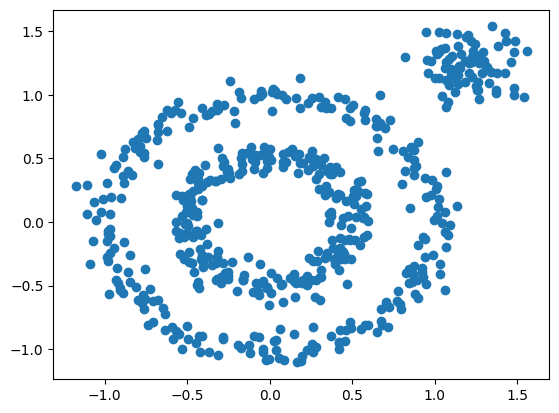

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# 生成环形数据集（500个样本）
X1, y1=datasets.make_circles(n_samples=500, factor=0.5, noise=0.07, 
                             random_state=0)

# 生成点块数据集（80个样本）
X2, y2 = datasets.make_blobs(n_samples=80, n_features=2, centers=[[1.2, 1.2]], 
                             cluster_std=[[0.15]], random_state=0)

# 合并成一个数据集，生成散点图
X = np.concatenate((X1, X2))
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

### 第2步 尝试用KMeans、MeanShift、Birch聚成3类

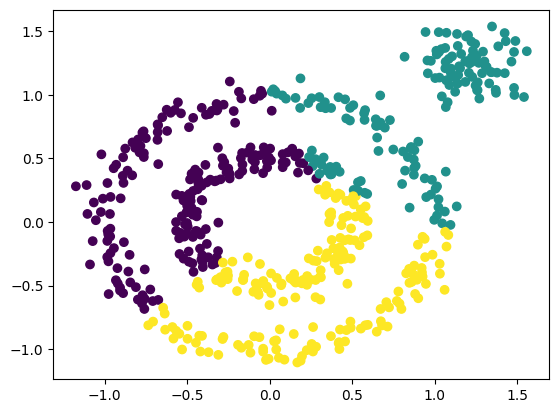

In [2]:
from sklearn.cluster import KMeans, MeanShift, Birch

# 尝试三种聚类模型，都不能达到目的
y_pred = KMeans(3).fit_predict(X) # KMeans
# y_pred = Birch(n_clusters=3).fit_predict(X) # Birch
# y_pred = MeanShift().fit_predict(X) # MeanShift

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

### 第3步、使用DBSCAN算法，不指定参数

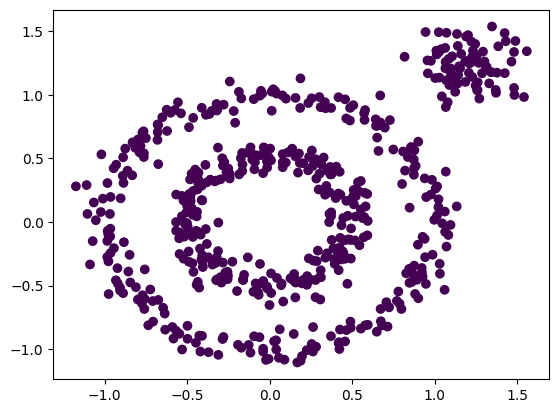

In [3]:
from sklearn.cluster import DBSCAN

# 使用无参数的DBSCAN聚类，发现模型将所有样本归为了一类
y_pred = DBSCAN().fit_predict(X)

# 画散点图
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

### 第4步 指定DBSCAN模型的参数
+ eps-临近半径
+ min_samples-最小样本数

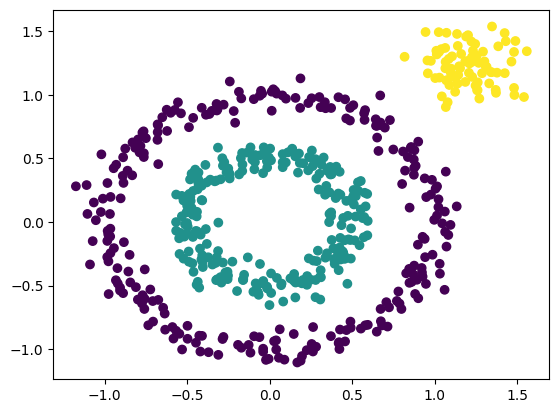

In [4]:
# 指定参数，调参，任务完成（聚成内、中、外3类）
y_pred = DBSCAN(eps=0.2, min_samples=2).fit_predict(X)

# 画散点图
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

plt.show()

## DBSCAN密度聚类案例（二）
+ 实现下列指定的数据集聚类
+ 要求：聚成上、下两类

### 第1步、生成数据集

C:\Users\13428\AppData\Local\Temp\ipykernel_17884\3794617311.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s = 100, alpha = 0.6,


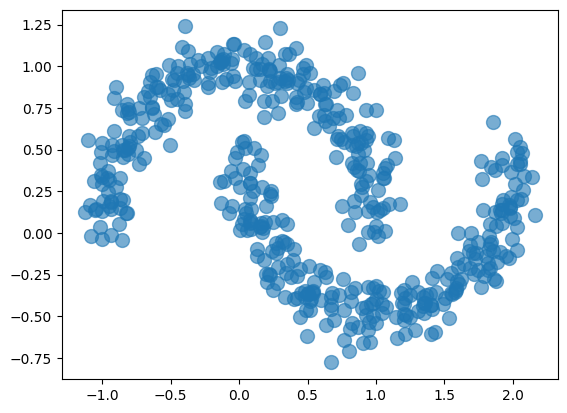

In [5]:
import matplotlib.pyplot as plt
from sklearn import datasets

# 生成弯月数据集（500个样本）
X, y = datasets.make_moons(500, noise = 0.1, random_state=99)

# 显示散点图
plt.scatter(X[:, 0], X[:, 1], s = 100, alpha = 0.6, 
            cmap = 'rainbow')

plt.show()

## 第2步、尝试用KMeans、MeanShift、Birch实现

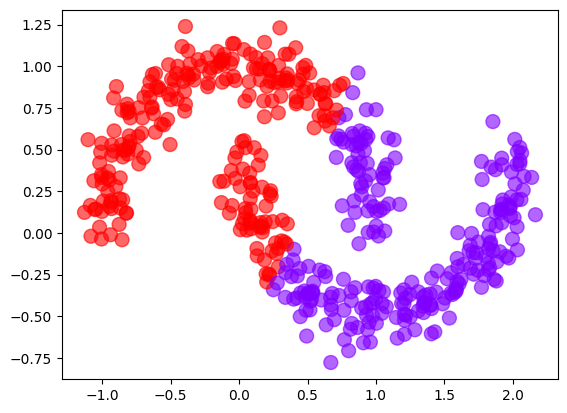

In [6]:
from sklearn.cluster import KMeans, MeanShift, Birch

# 尝试三种聚类模型，都不能达到目的
y_pred = KMeans(2).fit_predict(X) # KMeans
# y_pred = Birch(n_clusters=2).fit_predict(X) # Birch
# y_pred = MeanShift().fit_predict(X) # MeanShift

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s = 100, 
            alpha = 0.6, cmap = 'rainbow')

plt.show()

### 第3步、使用DBSCAN算法，不指定参数

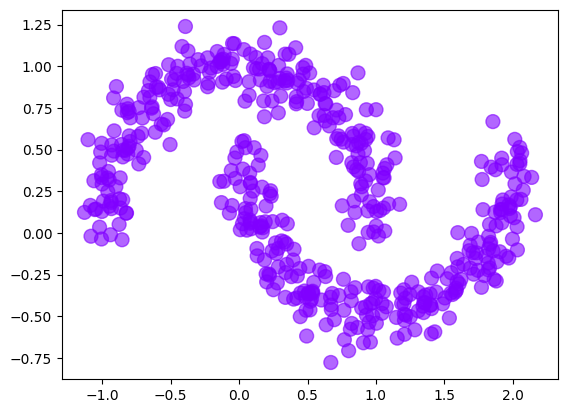

In [7]:
from sklearn.cluster import DBSCAN

# 使用DBSCAN算法（不指定参数）
y_pred = DBSCAN().fit_predict(X)

# 画散点图
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s = 100, 
            alpha = 0.6, cmap = 'rainbow')

plt.show()

### 第4步、调参，完成任务

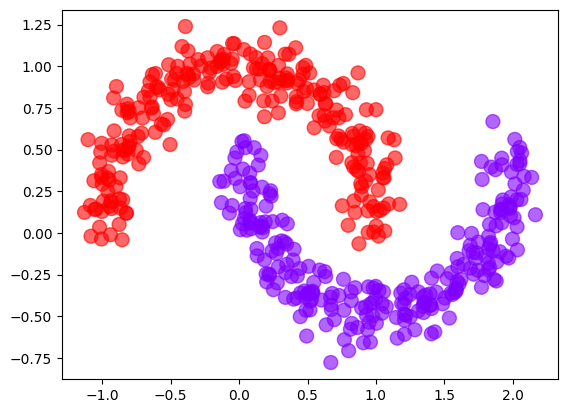

In [8]:
# 指定参数，调参，任务完成（聚成上下2类）
y_pred = DBSCAN(eps=0.2, min_samples=9).fit_predict(X)

# 画散点图
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s = 100, 
            alpha = 0.6, cmap = 'rainbow')

plt.show()

## 使用轮廓系数（silhouette_score）评估聚类模型
+ adjusted_rand_score指标用来评估聚类结果与实际类别标签的匹配度
+ silhouette_score指标用来评估聚类结果中，样本的内聚度和分离度
+ silhouette_score的参数：
  + 样本数据
  + 聚类结果

### 第一步、生成数据

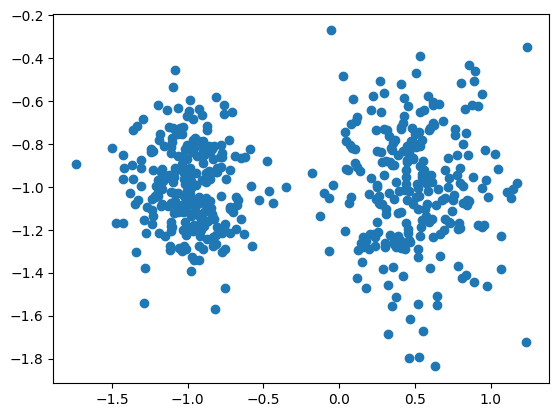

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 使用数据生成器随机生成500个样本，每个样本2个特征
X, y = make_blobs(n_samples=500, n_features=2, centers=[[-1,-1], [0.5,-1]], 
                  cluster_std=[0.2, 0.3], random_state=6)

# 画出散点图
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

### 第二步、使用轮廓系数评估聚类结果

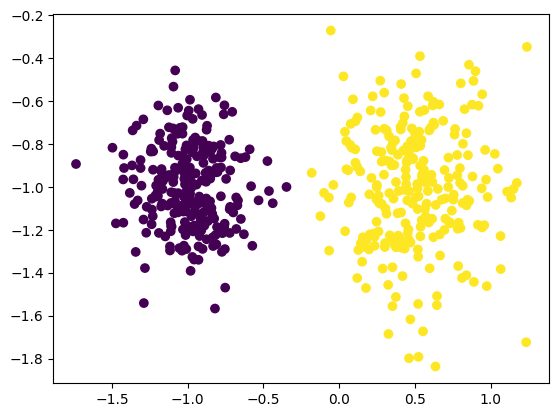

score:  0.7137530736747895


In [10]:
from sklearn.metrics import silhouette_score # 轮廓系数评估函数
from sklearn.cluster import MeanShift

# 使用MeanShift聚类
y_pred = MeanShift().fit_predict(X)

# 画出聚类散点图
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show() 

# 评估轮廓系数
score = silhouette_score(X, y_pred)
print('score: ', score)